## Initial

In [24]:
! pip install pyecharts

In [25]:
import pyecharts.options as opts
from pyecharts.globals import ThemeType
from pyecharts.commons.utils import JsCode
from pyecharts.charts import Timeline, Grid, Bar, Map, Line, Boxplot, Scatter
from pyecharts.faker import Faker
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Load Data

In [45]:
happy_2015 = pd.read_csv("D:\\Github\\STA141B_world_happiness\\2015.csv") # region infromation
happy_910 = pd.read_csv("D:\\Github\\STA141B_world_happiness\\happiness_9&10.csv") #main data

In [46]:
data = happy_910
years=[2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
data.head(10)

,Unnamed: 0,Country.name,year,Life.Ladder,Log.GDP.per.capita,Social.support,Healthy.life.expectancy.at.birth,Freedom.to.make.life.choices,Generosity,Perceptions.of.corruption,Positive.affect,Negative.affect
0,1,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
1,2,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
2,3,Afghanistan,2013,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273
3,4,Afghanistan,2014,3.131,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375
4,5,Afghanistan,2015,3.983,7.702,0.529,53.20,0.389,0.080,0.881,0.554,0.339
5,6,Afghanistan,2016,4.220,7.697,0.559,53.00,0.523,0.042,0.793,0.565,0.348
6,7,Afghanistan,2017,2.662,7.697,0.491,52.80,0.427,-0.121,0.954,0.496,0.371
7,8,Afghanistan,2018,2.694,7.692,0.508,52.60,0.374,-0.094,0.928,0.424,0.405
8,9,Afghanistan,2019,2.375,7.697,0.420,52.40,0.394,-0.108,0.924,0.351,0.502
9,10,Albania,2011,5.867,9.331,0.759,66.68,0.487,-0.205,0.877,0.628,0.257


## Map

In [47]:
datas=[]
for y in years:
    dict_year={}
    dict_year['time']=y
    data_list=[[i[1],i[2]] for i in data[data['year']==y][["Country.name", "Life.Ladder"]].itertuples()]
    dict_year['data']=data_list
    datas.append(dict_year)
    
#print(datas) #map data frame

In [48]:
def get_year_chart(year:int, hist= True):
    map_data=[i['data'] for i in datas if i['time'] == year][0]
    map_all=map_data
    map_data = sorted(map_data, key=(lambda x: x[1]), reverse=True)[:10] # 关键点（对柱形图展示有帮助）

    if hist:
      min_data,max_data = (
          min([d[1] for d in map_data]),
          max([d[1] for d in map_data])
      )
    else:
      min_data,max_data = (
          min([d[1] for d in map_all]),
          max([d[1] for d in map_all])
      )

    # plot map
    map_chart = (
        Map(init_opts=opts.InitOpts(theme=ThemeType.DARK))
            .add(series_name='', data_pair=map_all,maptype="world")
            .set_global_opts(
            title_opts=opts.TitleOpts(
                title="{} Happiness Scores Around the World".format(year),
                pos_left="center",
                pos_top="top",
                title_textstyle_opts=opts.TextStyleOpts(font_size=40, color='white')
            ),
            visualmap_opts=opts.VisualMapOpts(min_=min_data,
                              max_=max_data,
                              pos_left="10",
                              pos_top="center",
                              range_text=["High", "Low"],
                              range_color=["lightskyblue", "yellow", "orangered"],
                              textstyle_opts=opts.TextStyleOpts(font_size=10,color="#ddd"),
                              dimension=0, 
                              )
        )
    )

    if hist:
      # hist plot
      bar_x_data=[x[0] for x in map_data]
      bar_y_data=[x[1] for x in map_data]
      bar = (
          Bar(init_opts=opts.InitOpts(theme=ThemeType.DARK))
              .add_xaxis(xaxis_data=bar_x_data)
              .add_yaxis(
              series_name="",
              y_axis=bar_y_data,
              label_opts=opts.LabelOpts(
                  is_show=True, position="right", formatter="{b}: {c}"  # Complete label 
              )
          )
              .reversal_axis()
              .set_global_opts(
              visualmap_opts=opts.VisualMapOpts(
                  dimension=0,  
                  pos_left="10",
                  pos_top="center",
                  range_text=["High", "Low"],
                  range_color=["lightskyblue", "yellow", "red"],
                  textstyle_opts=opts.TextStyleOpts(font_size=10,color="#ddd"),
                  min_=min_data,
                  max_=max_data
              )
          )

      )
      # combine togethere
      grid_chart= (
          Grid()
          .add(bar,grid_opts=opts.GridOpts(pos_left="5",pos_right="75%", pos_top="65%", pos_bottom="20%"))
          .add(map_chart, grid_opts=opts.GridOpts(pos_left="5", pos_right="5", pos_top="1%", pos_bottom="0%"))
      )

      return grid_chart
    else:
      return map_chart


In [49]:
time_list = list(range(2011,2021))
timeline = Timeline(init_opts=opts.InitOpts(width="1500px", height="800px", theme=ThemeType.DARK))

# Start to compile the time carousel
for y in time_list:
    g=get_year_chart(y, hist=False)
    timeline.add(g,time_point=str(y))  

# time carousel setting
timeline.add_schema(
    orient="vertical",   # Type of timeline: vertical
    is_auto_play=True,   # Whether to play automatically
    is_inverse=True,     # Whether to place the timeline in the reverse direction
    play_interval=1000,   # Indicates the playback speed (jump interval), in milliseconds (ms)
    pos_left="null",
    pos_right="5",
    pos_top="20",
    pos_bottom="20",
    width="50", # The width of the timeline area
    label_opts=opts.LabelOpts(is_show=True, color="#fff",font_size=14), # Axis label configuration of the time axis
)

timeline.render('timeline_world.html')

'D:\\Github\\STA141B_world_happiness\\STA 141B Final Project [P1 & P2 Jupyter Notebooks]\\timeline_world.html'

In [50]:
timeline = Timeline(init_opts=opts.InitOpts(width="1500px", height="800px", theme=ThemeType.DARK))

# Start to compile the time carousel
for y in time_list:
    g=get_year_chart(y)
    timeline.add(g,time_point=str(y))  

# time carousel setting
timeline.add_schema(
    orient="vertical",   # Type of timeline: vertical
    is_auto_play=True,   # Whether to play automatically
    is_inverse=True,     # Whether to place the timeline in the reverse direction
    play_interval=1000,   # Indicates the playback speed (jump interval), in milliseconds (ms)
    pos_left="null",
    pos_right="5",
    pos_top="20",
    pos_bottom="20",
    width="50", # The width of the timeline area
    label_opts=opts.LabelOpts(is_show=True, color="#fff",font_size=14), # Axis label configuration of the time axis
)

timeline.render('timeline_top10.html')

'D:\\Github\\STA141B_world_happiness\\STA 141B Final Project [P1 & P2 Jupyter Notebooks]\\timeline_top10.html'

This animated picture(timeline_world.html:All html files are saved in the folder where the ipynb file is located) shows the World Happiness Index for the period 2011-2020. The happiness index of each country is represented by color. The redder the color, the higher the score, and the bluer the score, the lower the score. Countries with missing data are filled in with white. We can see that some regions are always orange or even red, such as North America, Northern Europe, Australia and New Zealand.

In addition, although the missing countries change every year, data missing in Africa is more serious than in other continents.

Next, we want to see which country ranks in the top ten happiness index every year(timeline_top10.html). In this photo, the histogram of happiness index of these countries is counted and marked on the map. Other countries/regions are shown in blue, and countries/regions with missing data are still white.

## Region

In [32]:
region = happy_2015[['Country','Region']].set_index('Country')
data = data.reset_index().set_index('Country.name')

region = data.join(region)

region.drop(['index','Unnamed: 0'], axis=1, inplace=True)
region.reset_index(inplace=True)

# region.loc[region['Region'].isnull()]  North Macedonia and Taiwan Province of China have NaN in Region

region.loc[region['index'] == 'North Macedonia', 'Region'] = 'Western Europe'
region.loc[region['index'] == 'Taiwan Province of China', 'Region'] = 'Eastern Asia'

region.head()

,index,year,Life.Ladder,Log.GDP.per.capita,Social.support,Healthy.life.expectancy.at.birth,Freedom.to.make.life.choices,Generosity,Perceptions.of.corruption,Positive.affect,Negative.affect,Region
0,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,Southern Asia
1,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,Southern Asia
2,Afghanistan,2013,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273,Southern Asia
3,Afghanistan,2014,3.131,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375,Southern Asia
4,Afghanistan,2015,3.983,7.702,0.529,53.20,0.389,0.080,0.881,0.554,0.339,Southern Asia


## Longitude

In [33]:
region_name = list(set(region['Region'].to_list()))
region_mean = region[['Region', 'year', 'Life.Ladder']].groupby(['Region', 'year'], as_index=False).mean()
time_list = list(map(str, time_list))

line1=Line(init_opts=opts.InitOpts(width="1500px", height="800px",theme=ThemeType.DARK))
    
line1.add_xaxis(time_list)

for n in region_name:
  y = region_mean.round(3).loc[region_mean['Region']==n, 'Life.Ladder'].to_list()
  line1.add_yaxis(series_name=n,
        y_axis=y,
        symbol="emptyCircle",
        is_symbol_show=True,
        label_opts=opts.LabelOpts(is_show=True),
        symbol_size=6,
        )

line1.set_global_opts(
        tooltip_opts=opts.TooltipOpts(trigger="item"),
        yaxis_opts=opts.AxisOpts(
            type_="value",
            axistick_opts=opts.AxisTickOpts(is_show=True),
            splitline_opts=opts.SplitLineOpts(is_show=True),
            min_ = 3.9,
            max_ = 7.5
        ),
        xaxis_opts=opts.AxisOpts(type_="category", boundary_gap=False, splitline_opts=opts.SplitLineOpts(is_show=True)),)

line1.render('Longitude.html')

'D:\\Github\\STA141B_world_happiness\\STA 141B Final Project [P1 & P2 Jupyter Notebooks]\\Longitude.html'

The impact of the covid-19 epidemic that we are concerned about on the world happiness index can also be seen in this picture(Longitude.html). This impact is different for each region: from 2019 to 2020, North America and Australia and New Zealand have hardly changed. Western Europe, Southeastern Asia, Latin America and Caribbean declined significantly. Eastern Asia, Central and Eastern Europe, Middle East and Northern Africa have slightly increased. Sub-Saharan Africa and Southern Asia also rose, but at the same time, the data missing in 2020 is more serious than in 2019
It can be seen from the first two pictures that the happiness index has a regional pattern. I calculated the average happiness index of each region from 2011 to 2020 based on the region of each country given by the data, and drew a line graph to represent their trend.

## Region Distribution Boxplot

In [35]:
region2 = region.loc[:,['Region', 'year', 'Life.Ladder']]

region2.loc[region['Region'] == 'North America', 'Region'] = 'North America & ANZ'
region2.loc[region['Region'] == 'Australia and New Zealand', 'Region'] = 'North America & ANZ'

In [36]:
region_name = list(set(region2['Region'].to_list()))
region_name.remove('Southern Asia')
region_name.append('Southern Asia') # In 2020, only two data points in Southern Asia. Boxplot cannot show it.

time_list = list(map(str, time_list))

def box_plot(year):
  year = int(year)

  box=Boxplot(init_opts=opts.InitOpts(width="1500px", height="800px", theme=ThemeType.DARK))
      
  box.add_xaxis(region_name)

  y = []
  for n in region_name:
    y.append(region2.loc[(region2['Region']==n) & (region2['year']==year), 'Life.Ladder'].round(3).to_list())
    
  box.add_yaxis(str(year), y_axis=box.prepare_data(y),)

  box.set_global_opts(
          tooltip_opts=opts.TooltipOpts(trigger="item"),
          yaxis_opts=opts.AxisOpts(
              type_="value",
              axistick_opts=opts.AxisTickOpts(is_show=True),
              splitline_opts=opts.SplitLineOpts(is_show=True),
              min_=2
          ),
          xaxis_opts=opts.AxisOpts(boundary_gap=True,
                      splitarea_opts=opts.SplitAreaOpts(is_show=True),
                      splitline_opts=opts.SplitLineOpts(is_show=True),
                      axistick_opts=opts.AxisTickOpts(is_show=False,is_align_with_label=False),
                      axislabel_opts=opts.LabelOpts(interval=0),
                      ),
  )
 
  return box

timeline = Timeline(init_opts=opts.InitOpts(width="1500px", height="800px", theme=ThemeType.DARK))

# Start to compile the time carousel
for y in time_list:
    g=box_plot(y)
    timeline.add(g,time_point=str(y))  

# time carousel setting
timeline.add_schema(
    orient="vertical",   # Type of timeline: vertical
    is_auto_play=True,   # Whether to play automatically
    is_inverse=True,     # Whether to place the timeline in the reverse direction
    play_interval=1000,   # Indicates the playback speed (jump interval), in milliseconds (ms)
    pos_left="null",
    pos_right="5",
    pos_top="20",
    pos_bottom="20",
    width="50", # The width of the timeline area
    label_opts=opts.LabelOpts(is_show=True, color="#fff",font_size=14), # Axis label configuration of the time axis
)

timeline.render('region_distribution.html')

'D:\\Github\\STA141B_world_happiness\\STA 141B Final Project [P1 & P2 Jupyter Notebooks]\\region_distribution.html'

Because both North America only has two data point, and they have similar performance with Australia and New Zealand, I consider these two regions together. Then I drew the boxplot of the 9 regions of the world over time(region_distribution.html). Since we do not have enough data for Southern Asia in 2020 to plot a boxplot, it disapperas in 2020's plot.

As we can see, Middle East and Northern Africa and Latin America and Caribbean have highest variance. Sub-Saharan Africa has the lowest average score. Surprisingly, Western Europe also has a very hign variance. However, its mean and the lower bound are still higher than most other regions.

Moreover, 


## Correlations

This figure shows the correlation between variables. The Life.Ladder (Happiness score) has a relative high and positive correlation with most covariates. But, Perceptions.of.corruption has negative correlation with all variables, and Generosity's correlation to others are closest to 0.

With our display order, positive correlation focuses on the first few variables and the lastest few variables show negative correlation. The value change trend is obvious.

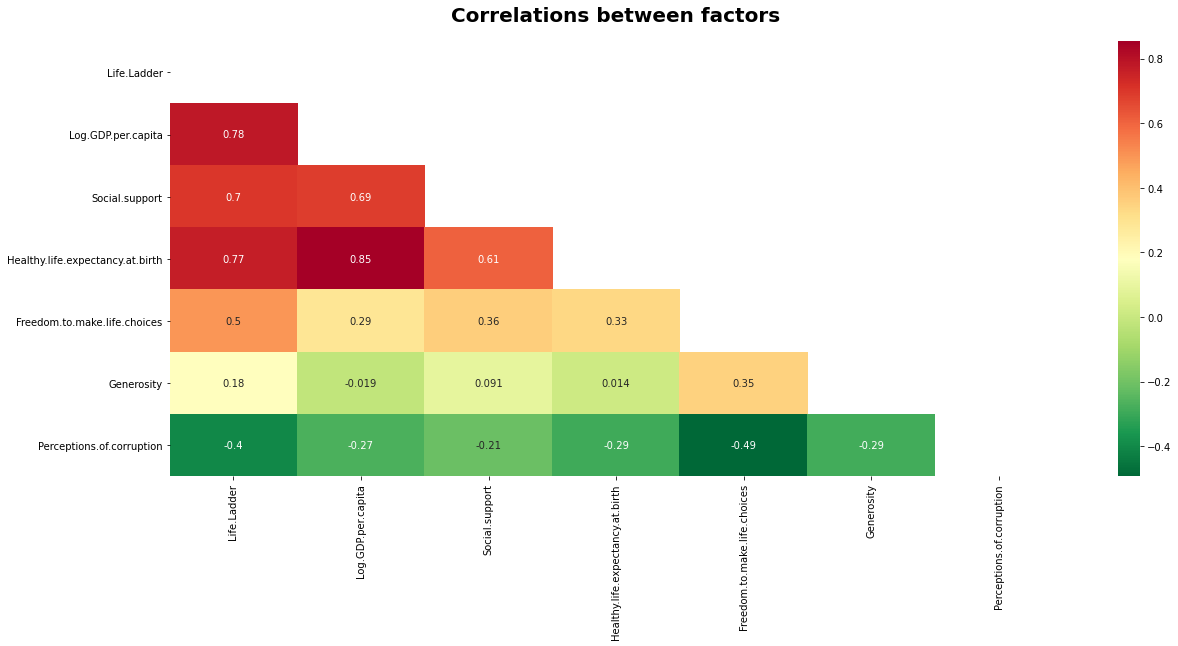

In [38]:

sns.set_palette('RdYlGn_r')

cols = data[['Life.Ladder', 'Log.GDP.per.capita','Social.support', 'Healthy.life.expectancy.at.birth',
       'Freedom.to.make.life.choices', 'Generosity','Perceptions.of.corruption']]

plt.figure(figsize=(20, 8))
sns.heatmap(cols.corr(), annot = True, cmap='RdYlGn_r', mask=np.triu(np.ones_like(cols.corr())));
plt.title('Correlations between factors', fontsize=20, fontweight='bold', pad=20);

We also chose three pairs of variables, which have high positive, middel and negative correlation respectively, to have a close look of their distributions and correlation.

First, we consider the ladder score v.s. Log GDP per capita. As we can see, they have a relatively even distribution and obvious correlation.

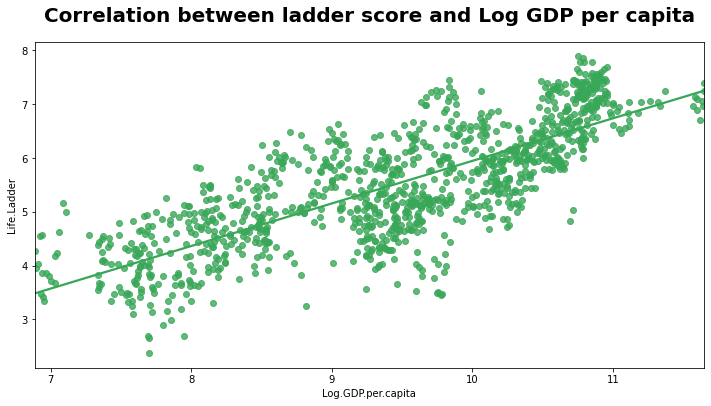

In [39]:
plt.figure(figsize=(12, 6))
sns.regplot( x='Log.GDP.per.capita',y='Life.Ladder', data=data, ci=None);
plt.title('Correlation between ladder score and Log GDP per capita', fontsize=20, fontweight='bold', pad=20);

Next, we show the distribution between ladder score and Freedom to make life choices. The most data points are concentrated in the part where the Freedom is greater than 0.7.

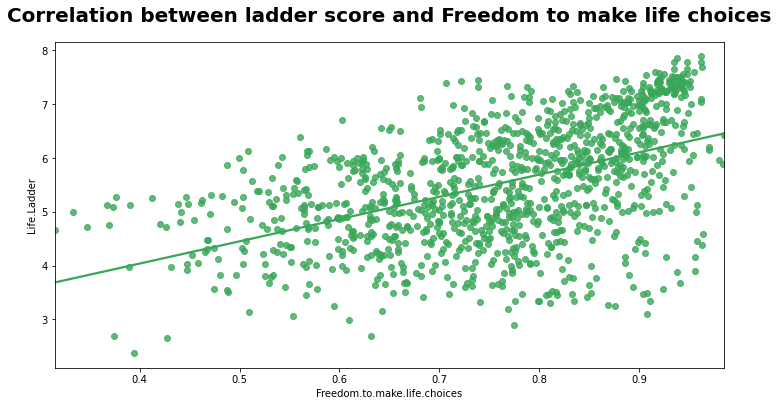

In [40]:
plt.figure(figsize=(12, 6))
sns.regplot(x='Freedom.to.make.life.choices',y='Life.Ladder', data=data, ci=None);
plt.title('Correlation between ladder score and Freedom to make life choices', fontsize=20, fontweight='bold', pad=20);

Finally, we show the distribution between ladder score and Perceptions of corruption. The unevenness of the data is more obvious. The data shows a strong linear relationship in the part where perceotion is less than 0.6, and more uniform in the part greater than 0.6.

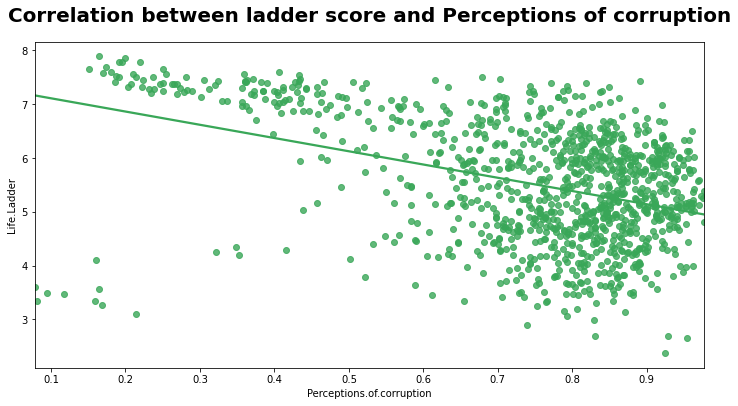

In [41]:
plt.figure(figsize=(12, 6))
sns.regplot(x='Perceptions.of.corruption', y='Life.Ladder', data=data, ci=None);
plt.title('Correlation between ladder score and Perceptions of corruption', fontsize=20, fontweight='bold', pad=20);


## Variance

In this part, we show the the variance distribution over country. Unlike the previous boxplot, the variance here is the longitudinal distribution of the data of each country, rather than the intra-regional distribution perspective.

Form the plot, we can find a small number of top countries have very large variances, while the distribution of happiness in most countries is relatively stable over time.

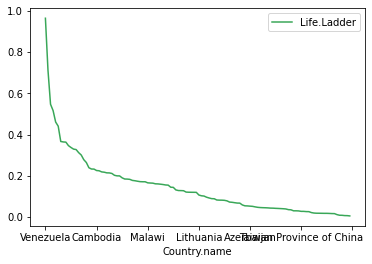

In [42]:
var_df = data.groupby(['Country.name'])['Life.Ladder'].var()
var_df = pd.DataFrame(var_df).sort_values(by='Life.Ladder', ascending=False)
var_df.plot()

Thus, we demonstrate the top ten countries in variance and their score change over time. From the plot, we can see, Most of them are not rich countries in the usual sense and are Africa countries. 

Moreover, most of them have high variances because the rapid decline and violent fluctuations in scores(var.html). But these are three countries (Benin, Senegal and Guinea) are different because their scores have high risen. Senegal's score increases all the time, while Benin and Guinea have a increasing socure before 2018.

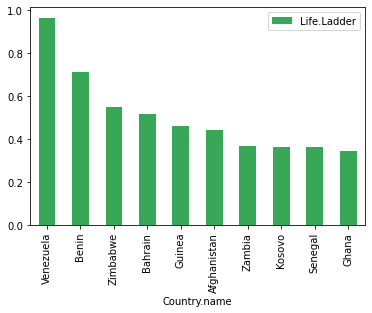

In [52]:
var_df.head(10).plot(kind='bar')

In [53]:
country_name = var_df.head(10).reset_index()['Country.name'].tolist()
country_mean = data[['Country.name', 'year', 'Life.Ladder']].groupby(['Country.name', 'year'], as_index=False).mean()
time_list = list(range(2011,2021))
time_list = list(map(str, time_list))

line1=Line(init_opts=opts.InitOpts(width="1500px", height="800px",theme=ThemeType.DARK))
    
line1.add_xaxis(time_list)

for n in country_name:
  y = country_mean.round(3).loc[country_mean['Country.name']==n, 'Life.Ladder'].to_list()
  line1.add_yaxis(series_name=n,
        y_axis=y,
        symbol="emptyCircle",
        is_symbol_show=True,
        label_opts=opts.LabelOpts(is_show=True),
        symbol_size=6,
        )

line1.set_global_opts(
        tooltip_opts=opts.TooltipOpts(trigger="item"),
        yaxis_opts=opts.AxisOpts(
            type_="value",
            axistick_opts=opts.AxisTickOpts(is_show=True),
            splitline_opts=opts.SplitLineOpts(is_show=True),
            min_ = 2.2,
            max_ = 7.1
        ),
        xaxis_opts=opts.AxisOpts(type_="category", boundary_gap=False, splitline_opts=opts.SplitLineOpts(is_show=True)),)

line1.render('var.html')

'D:\\Github\\STA141B_world_happiness\\STA 141B Final Project [P1 & P2 Jupyter Notebooks]\\var.html'